importing libraries

In [2]:
import pandas as pd
import cv2

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')


data visualisation

In [3]:
df = pd.read_csv(r"D:\machine learning\yolo_object_detection\labels_train.csv\labels_train.csv")
df = shuffle(df)
df.head()

frame  xmin  xmax  ymin  ymax  class_id
13629   1478022262093656256.jpg   131   149   138   153         1
77305   1479500303596160164.jpg   247   273   125   143         1
121486  1479505263936339760.jpg   265   283   138   155         1
99360   1479503105787723216.jpg    77    89   131   163         3
24218   1478732536009531711.jpg   361   371   110   128         5

In [4]:
classes = df.class_id.unique()
print(classes)

[1 3 5 2 4]


In [5]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

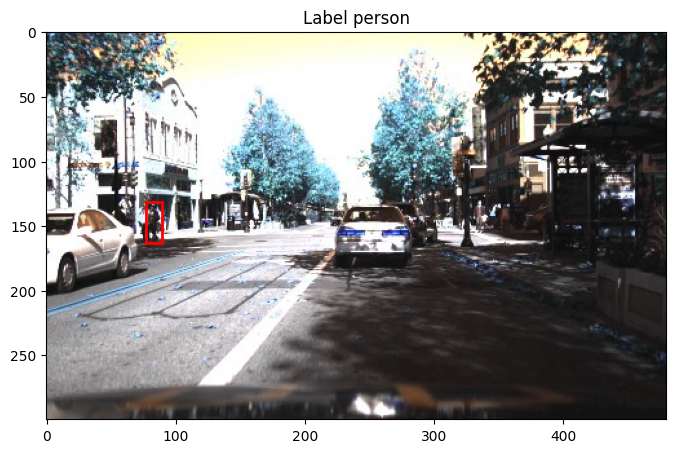

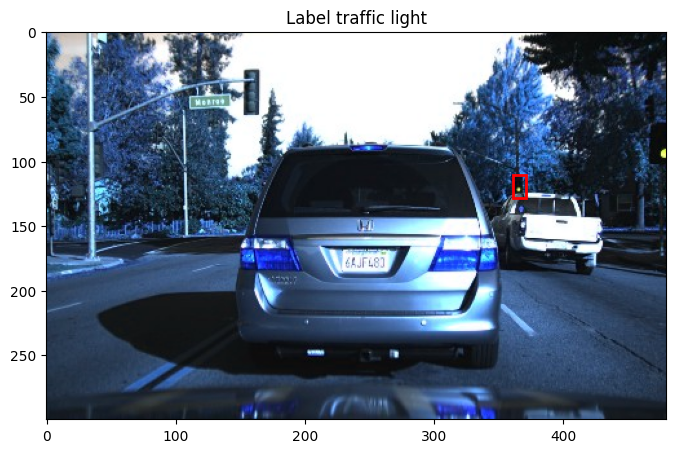

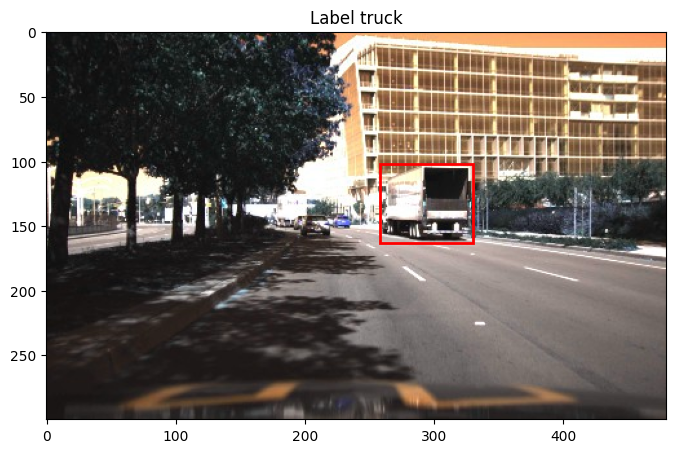

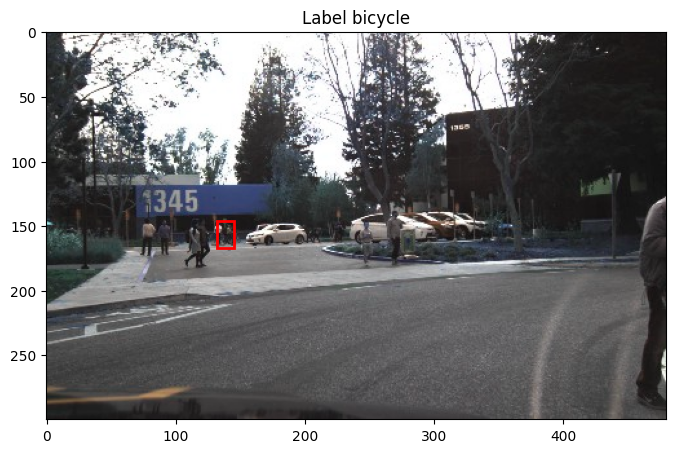

In [6]:
import os

boxes = {}
images = {}

base_path = r'D:\machine learning\yolo_object_detection\images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    image_path = os.path.join(base_path, first_row['frame'])
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not loaded: {image_path}")
        continue

    images[class_id] = image
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

for i in classes:
    if i in images:
        xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

        plt.figure(figsize=(8, 10))
        plt.title("Label " + labels[i])
        plt.imshow(images[i])
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='red', fill=False, linewidth=2))

        plt.show()
    else:
        print(f"No image data for class: {i}")

model

In [7]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

In [8]:
model = YOLO("yolov8m.pt")

In [9]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [10]:
results=model.predict(source=r'D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg',
                      save=True, conf=0.2,iou=0.5)


image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 616.0ms
Speed: 10.0ms preprocess, 616.0ms inference, 1803.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [11]:
result = results[0]
box = result.boxes[0]

In [12]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [13]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [433.603271484375, 121.6790542602539, 454.5157470703125, 181.96151733398438]
Probability: 0.7077030539512634


In [14]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: person
Coordinates: [434, 122, 455, 182]
Probability: 0.71
---
Object type: car
Coordinates: [240, 145, 251, 154]
Probability: 0.38
---
Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---


In [15]:
results1 = model.predict(source=r'D:\machine learning\yolo_object_detection\images\1478019953180167674.jpg',
                         save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 D:\machine learning\yolo_object_detection\images\1478019953180167674.jpg: 416x640 1 person, 1 car, 535.7ms
Speed: 3.0ms preprocess, 535.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


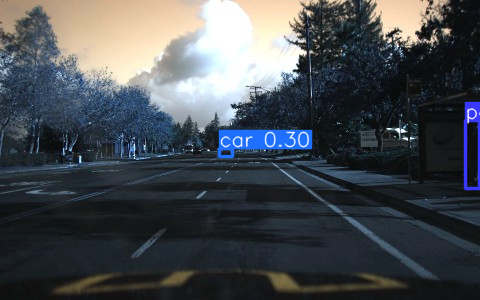

In [16]:
# Plotting results
plot = results1[0].plot()
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg: 416x640 3 cars, 544.4ms
Speed: 2.0ms preprocess, 544.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [413.53045654296875, 127.00181579589844, 461.52423095703125, 148.55072021484375]
Probability: 0.561957836151123
Object type: car
Coordinates: [414, 127, 462, 149]
Probability: 0.56
---
Object type: car
Coordinates: [209, 147, 220, 155]
Probability: 0.23
---
Object type: car
Coordinates: [174, 144, 191, 154]
Probability: 0.21
---

image 1/1 D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg: 416x640 3 cars, 489.7ms
Speed: 4.0ms preprocess, 489.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


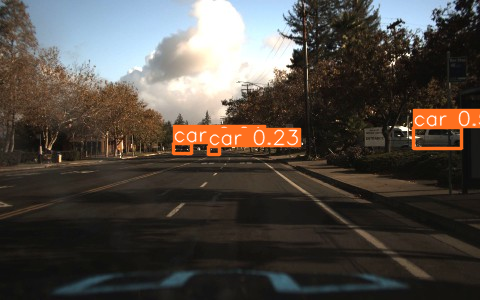

In [17]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg",save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg: 416x640 3 cars, 536.2ms
Speed: 2.0ms preprocess, 536.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [426.68133544921875, 125.31210327148438, 480.0, 148.13040161132812]
Probability: 0.42830461263656616
Object type: car
Coordinates: [427, 125, 480, 148]
Probability: 0.43
---
Object type: car
Coordinates: [167, 145, 184, 155]
Probability: 0.38
---
Object type: car
Coordinates: [202, 146, 213, 155]
Probability: 0.38
---

image 1/1 D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg: 416x640 3 cars, 524.9ms
Speed: 2.0ms preprocess, 524.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


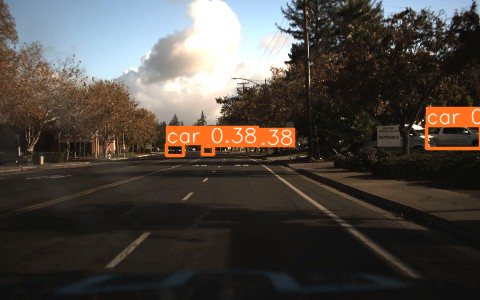

In [18]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\many_cars.jpeg: 416x640 14 cars, 2 buss, 4 trucks, 561.2ms
Speed: 3.0ms preprocess, 561.2ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [265.3670349121094, 180.9980926513672, 297.4741516113281, 214.33177185058594]
Probability: 0.6432431936264038
Object type: car
Coordinates: [265, 181, 297, 214]
Probability: 0.64
---
Object type: bus
Coordinates: [62, 133, 104, 183]
Probability: 0.64
---
Object type: car
Coordinates: [263, 144, 286, 164]
Probability: 0.55
---
Object type: car
Coordinates: [215, 190, 244, 216]
Probability: 0.54
---
Object type: car
Coordinates: [356, 136, 366, 160]
Probability: 0.51
---
Object type: car
Coordinates: [222, 156, 248, 184]
Probability: 0.49
---
Object type: car
Coordinates: [255, 117, 275, 134]
Probability: 0.44
---
Object type: truck
Coordinates: [351, 91, 366, 113]
Probability: 0.44
---
Object type: car
Coordinates

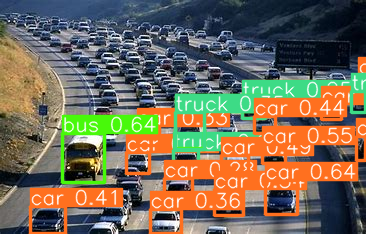

In [19]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\many_cars.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\many_cars.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\deer_on_road.jpeg: 448x640 1 car, 1 sheep, 640.8ms
Speed: 5.0ms preprocess, 640.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [213.2239227294922, 32.245582580566406, 284.4015808105469, 81.75514221191406]
Probability: 0.9012024998664856
Object type: car
Coordinates: [213, 32, 284, 82]
Probability: 0.9
---
Object type: sheep
Coordinates: [4, 66, 203, 226]
Probability: 0.22
---

image 1/1 D:\machine learning\yolo_object_detection\deer_on_road.jpeg: 448x640 1 car, 1 sheep, 620.2ms
Speed: 6.0ms preprocess, 620.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


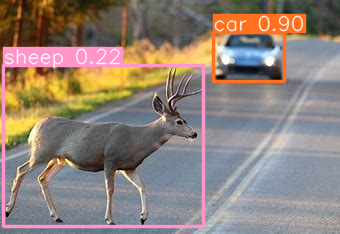

In [20]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\deer_on_road.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\deer_on_road.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\pig.jpeg: 480x640 2 cars, 1 cow, 596.7ms
Speed: 2.0ms preprocess, 596.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [0.3055495321750641, 25.513824462890625, 128.15232849121094, 186.88026428222656]
Probability: 0.9451835751533508
Object type: car
Coordinates: [0, 26, 128, 187]
Probability: 0.95
---
Object type: cow
Coordinates: [162, 125, 266, 182]
Probability: 0.9
---
Object type: car
Coordinates: [207, 25, 254, 70]
Probability: 0.75
---

image 1/1 D:\machine learning\yolo_object_detection\pig.jpeg: 480x640 2 cars, 1 cow, 603.7ms
Speed: 5.0ms preprocess, 603.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict2


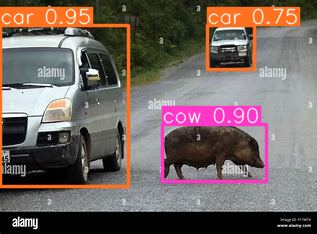

In [21]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\pig.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\pig.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

lane detection

In [22]:
import os 
print(os.listdir("D:\machine learning\yolo_object_detection\input"))

['test_image.jpg', 'test_video.mp4']


step 1: load the file and show

In [23]:
%matplotlib inline

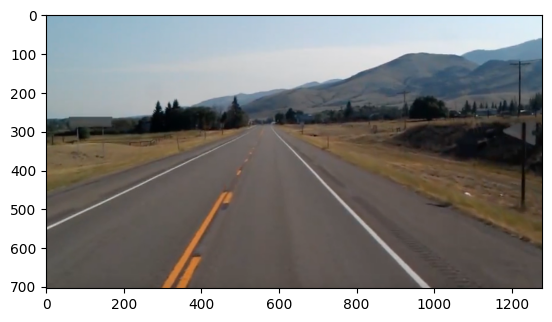

In [24]:
image =cv2.cvtColor(cv2.imread(r"D:\machine learning\yolo_object_detection\input\test_image.jpg"), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [25]:
import numpy as np
lane_image = np.copy(image)
lane_image.shape

(704, 1279, 3)

step 2: gray scale conversion of the image

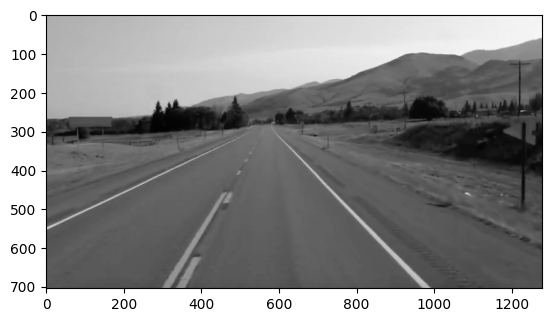

In [26]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

step 3: apply gaussian blur to reduce the noise in the gray scale image

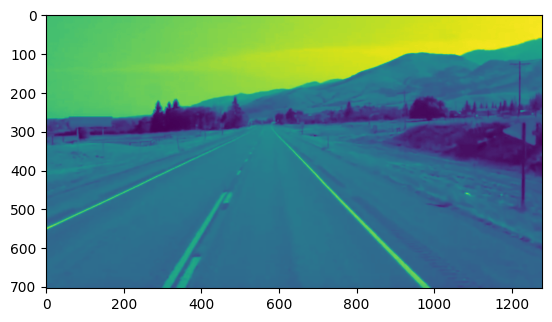

In [27]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blur)
plt.show()

step 4: apply canny method

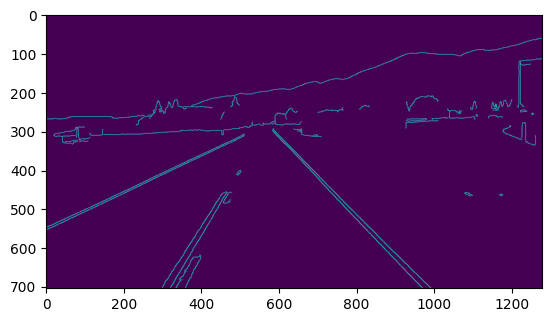

In [28]:
canny =cv2.Canny(blur,50,150)

plt.imshow(canny)
plt.show()

In [29]:
# put all the previous 3 steps in one function 
# gray scale conversion ==> applying gaussian blur ==> applying canny function

def Canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)

    return canny

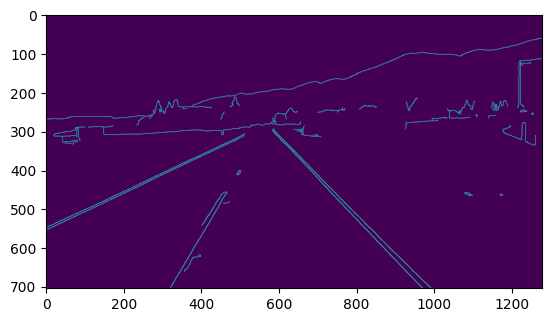

In [30]:
import numpy as np

image = cv2.imread(r"D:\machine learning\yolo_object_detection\input\test_image.jpg")
lane_image = np.copy(image)
canny = Canny(lane_image)

plt.imshow(canny)
plt.show()

make a function to find region of interest.

the region where we wanna find the lanes

then, apply bitwise AND operation in order to select just the region of interest

hough transform in order to find straight lines in the image

In [31]:
def region_of_interest(image):
    height = 700
    polygons = np.array([[(250,height), (1000,height), (600,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_region = cv2.bitwise_and(image, mask)

    return masked_region

In [32]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            if line is not None and len(line) == 4:
                x1, y1, x2, y2 = line
                cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

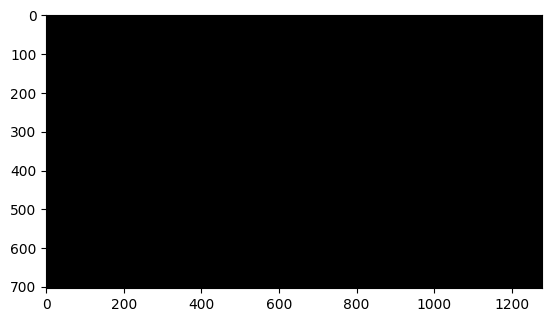

In [33]:
image = cv2.imread(r"D:\machine learning\yolo_object_detection\input\test_image.jpg")

lane_image = np.copy(image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)

lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
line_image = display_lines(lane_image, lines)

plt.imshow(line_image)
plt.show()

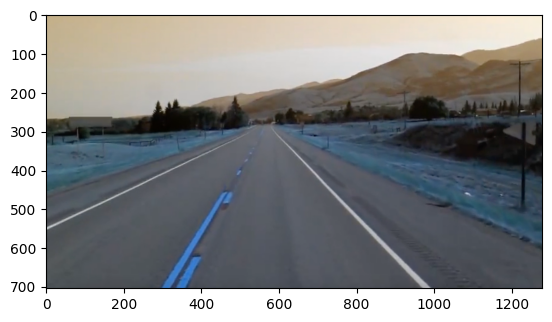

In [34]:
# final step: put it all together
# now combine the above immage containing just the lines in a black image with our original image

combo_image = cv2.addWeighted(lane_image, 1, line_image, 1, 1)

plt.imshow(combo_image)
plt.show()

optimization to refine the detection of lanes

In [35]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [36]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2), (y1,y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_line = right_line = None
    if left_fit:
        left_fit_average = np.average(left_fit, axis=0)
        left_line = make_coordinates(image, left_fit_average)
    if right_fit:
        right_fit_average = np.average(right_fit, axis=0)
        right_line = make_coordinates(image, right_fit_average)
    return left_line, right_line

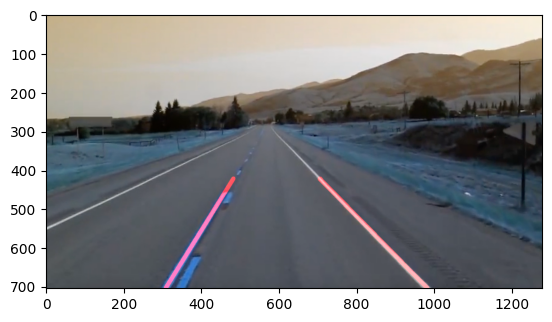

In [37]:
# reading the image and then calling all the functions one by one. 

image = cv2.imread(r"D:\machine learning\yolo_object_detection\input\test_image.jpg")

lane_image = np.copy(image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)

lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)

# final step: put it all together
# now combine the above immage containing just the lines in a black image with our original image

combo_image = cv2.addWeighted(lane_image, 1, line_image, 1, 1)

plt.imshow(combo_image)
plt.show()

now apply the same methods on a video file

which will take each frame of the video file

and detect the lanes in each frame

finally play all the frames showing lanes detected in a video.

In [38]:
cap = cv2.VideoCapture(r"D:\machine learning\yolo_object_detection\input\test_video.mp4")
while (cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break
    canny_image = Canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result", combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 974.6ms
Speed: 17.5ms preprocess, 974.6ms inference, 21.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 0.0
Coordinates: [433.603271484375, 121.6790542602539, 454.5157470703125, 181.96151733398438]
Probability: 0.7077030539512634
Object type: person
Coordinates: [434, 122, 455, 182]
Probability: 0.71
---
Object type: car
Coordinates: [240, 145, 251, 154]
Probability: 0.38
---
Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---
Decided action: Move Right

image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 1011.0ms
Speed: 7.0ms preprocess, 1011.0ms inference, 4.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


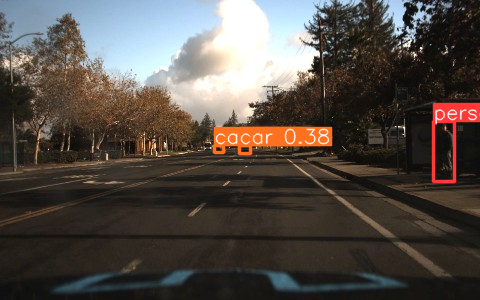

In [39]:
def decide_action(boxes, frame_width):
    # Divide the frame into three sections
    section_width = frame_width / 3

    # Initialize counters for vehicles in each section
    left_count = center_count = right_count = 0

    # Count the vehicles in each section
    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
        x_center = (xmin + xmax) / 2
        if x_center < section_width:
            left_count += 1
        elif x_center < section_width * 2:
            center_count += 1
        else:
            right_count += 1

    # Decide action based on vehicle counts
    if left_count > right_count and left_count > center_count:
        return "Move Right"
    elif right_count > left_count and right_count > center_count:
        return "Move Left"
    else:
        return "Move Forward"

# Existing code: Use the trained model to detect vehicles
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg", save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes
    masks = result.masks
    probs = result.probs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")


frame_width = 1280
action = decide_action(boxes, frame_width)
print("Decided action:", action)

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg", save=True, conf=0.2,iou=0.5)
Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [40]:
def decide_action(boxes, frame_width):
    # Divide the frame into three sections
    section_width = frame_width / 3

    # Initialize counters for vehicles in each section
    left_count = center_count = right_count = 0

    # Count the vehicles in each section
    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
        x_center = (xmin + xmax) / 2
        if x_center < section_width:
            left_count += 1
        elif x_center < section_width * 2:
            center_count += 1
        else:
            right_count += 1

    # Decide action based on vehicle counts
    if left_count > 0 and center_count > 0 and right_count > 0:
        return "Stop"
    elif left_count > right_count and left_count > center_count:
        return "Move Right"
    elif right_count > left_count and right_count > center_count:
        return "Move Left"
    else:
        return "Move Forward"

In [41]:
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print("---")

Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---



image 1/1 D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg: 640x608 4 cars, 1416.6ms
Speed: 9.2ms preprocess, 1416.6ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [113.58023071289062, 136.22132873535156, 154.0084991455078, 168.81336975097656]
Probability: 0.8887924551963806
Object type: car
Coordinates: [114, 136, 154, 169]
Probability: 0.89
---
Object type: car
Coordinates: [15, 133, 64, 176]
Probability: 0.87
---
Object type: car
Coordinates: [60, 78, 89, 102]
Probability: 0.76
---
Object type: car
Coordinates: [184, 108, 218, 137]
Probability: 0.38
---

image 1/1 D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg: 640x608 4 cars, 1210.3ms
Speed: 7.0ms preprocess, 1210.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs\detect\predict2


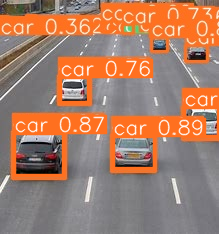

The text file is saved at: D:\machine learning\road_detection\bounding_boxes.txt


In [42]:
results_=model.predict(source=r"D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg", save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

# Open the file in write mode
with open('bounding_boxes.txt', 'w') as f:
    for result in results_:
        boxes = result.boxes
        masks = result.masks
        probs = result.probs

        cords = box.xyxy[0].tolist()
        class_id = box.cls[0].item()
        conf = box.conf[0].item()
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        f.write(f"Object type: {class_id}\n")
        f.write(f"Coordinates: {cords}\n")
        f.write(f"Probability: {conf}\n")

        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            conf = round(box.conf[0].item(), 2)
            print("Object type:", class_id)
            print("Coordinates:", cords)
            print("Probability:", conf)
            print("---")
            f.write(f"Object type: {class_id}\n")
            f.write(f"Coordinates: {cords}\n")
            f.write(f"Probability: {conf}\n")
            f.write("---\n")

results__ = model.predict(source=r"D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg", save=True, conf=0.2,iou=0.5)
Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

import os

# Get the current working directory
cwd = os.getcwd()

# Create the absolute file path
file_path = os.path.join(cwd, 'bounding_boxes.txt')

print(f"The text file is saved at: {file_path}")

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2), (y1,y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

def Canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1, y1, x2, y2 in lines:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

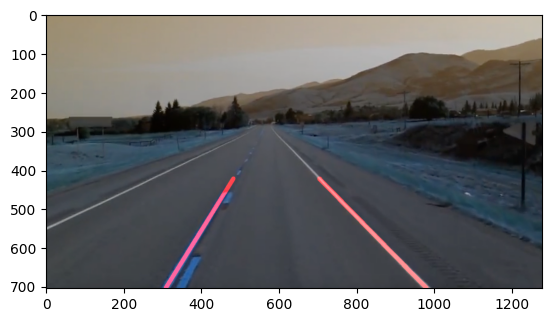

The text file is saved at: D:\machine learning\road_detection\bounding_boxes_road.txt


In [44]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def write_bounding_boxes_to_file(lines, file_path):
    with open(file_path, 'w') as f:
        for line in lines:
            x1, y1, x2, y2 = line
            # Calculate bounding box
            min_x = min(x1, x2)
            max_x = max(x1, x2)
            min_y = min(y1, y2)
            max_y = max(y1, y2)
            # Write bounding box to file
            f.write(f"{min_x},{min_y},{max_x},{max_y}\n")

# Replace this with the path to your image or video file
image_file = r"D:\machine learning\yolo_object_detection\input\test_image.jpg"

image = cv2.imread(image_file)
lane_image = np.copy(image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

# Write bounding boxes to file
write_bounding_boxes_to_file(averaged_lines, 'bounding_boxes_road.txt')

plt.imshow(combo_image)
plt.show()

import os

# Get the current working directory
cwd = os.getcwd()

# Create the absolute file path
file_path = os.path.join(cwd, 'bounding_boxes_road.txt')

print(f"The text file is saved at: {file_path}")